# Spotify Report

## Introduction
Spotify is one of the most popular music streaming services in the world. Spotify itself have a comprehensive and publicly available data for their entire library. The data include basic information about the songs, furthermore, it includes Spotify's own evaluation metrics for not only the tracks performance statistics but also the acoustic characteristics of each track on the site.

## Executive Summary

Spanning 100 years from 1921 to 2020, Spotify measured, with their own algorithm, over 170 thousand tracks recorded in its public database. Spotify's data team developed a system to categorize and measure characteristics of a track. Such as Danceability, Energy, Liveness, Speechiness.

In which popularity, a Spotify generated score that measures the performance of the track in the service. A score that every artist wants to improve to reach out into more people with their songs.

Some of these data can be used to gain deeper understanding of the Spotify users' taste for music and to improve an artists future track release to have the best chance of obtaining an high popularity score.

To our artist I give the following suggestions
- Reduce the use of acoustic elements
- Compose louder and more energy packed csongs
- Avoid D#/E♭ as main key for the track
---

## Preparation
Importing required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

Reading the used dataset:

In [2]:
df = pd.read_csv('data/data.csv') # Main dataset - Row is Track
dfGenre = pd.read_csv('data/data_by_genres.csv') # Row is Genre

## Main Dataset

### Data overview

In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
df.describe().round(decimals=2)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00
mean,0.53,1976.79,0.50,0.54,230948.31,0.48,0.08,0.17,5.20,0.21,-11.47,0.71,31.43,0.10,116.86
std,0.26,25.92,0.38,0.18,126118.41,0.27,0.28,0.31,3.52,0.17,5.70,0.46,21.83,0.16,30.71
min,0.00,1921.00,0.00,0.00,5108.00,0.00,0.00,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00
25%,0.32,1956.00,0.10,0.42,169827.00,0.26,0.00,0.00,2.00,0.10,-14.62,0.00,11.00,0.03,93.42
50%,0.54,1977.00,0.52,0.55,207467.00,0.47,0.00,0.00,5.00,0.14,-10.58,1.00,33.00,0.04,114.73
75%,0.75,1999.00,0.89,0.67,262400.00,0.70,0.00,0.10,8.00,0.26,-7.18,1.00,48.00,0.08,135.54
max,1.00,2020.00,1.00,0.99,5403500.00,1.00,1.00,1.00,11.00,1.00,3.86,1.00,100.00,0.97,243.51


There are a total of 170,653 songs in the dataset; there are 15 numerical categories and 3 categorical categories (name, artist, release_date). 

Tracks' initial release year range from 1921 to 2020; track length range from 5.1 seconds to 90 minutes long. 


### Understanding the Categories

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

#### Content
>The "data.csv" file contains more than 170,000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the other datasets. <br>
This dataset is uploaded by Kaggle user **Yamaç Eren Ay**, you can find the original dataset [here]("https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks). <br>
The detailed description of each category is taken directly from Spotify's website [here]("https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/").   

#### Description of each category:
|**Category**|**Description**|
|---|---|
|**id**|A unique id generated for the track|
|**popularity** | The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.
|**acousticness**|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
|**danceability**|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
|**energy**|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
|**duration_ms**|The duration of the track in milliseconds.
|**instrumentalness**|Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 
|**valence**|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
|**tempo**|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
|**liveness**|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 
|**loudness**|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
|**speechiness**|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
|**year**|Year of the song was released, from 1921 to 2020.
|**mode**|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
|**explicit**|0 = No explicit content, 1 = Explicit content.
|**key**|The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
|**artists**|The artists who performed the track.
|**release_date**|Date of release mostly in yyyy-mm-dd format, however precision of date may vary.
|**name**|Name of the track.

### Data cleaning

In [6]:
dfClean = df
dfClean.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Remove special characters from the artists column:

In [7]:
dfClean['artists'] = df['artists'].str.replace("'","", regex = True)
dfClean['artists'] = df['artists'].str.replace("[","", regex = True)
dfClean['artists'] = df['artists'].str.replace("]","", regex = True)

Convert miliseconds into seconds:

In [8]:
dfClean['duration_ms'] /= 1000
dfClean.rename(columns={'duration_ms': 'duration_s'}, inplace=1)

Reorder the columns based on category characteristics:

In [9]:
newCol = [
    'id', # Begin with categorical attributes of the song
    'name', 
    'artists',
    'release_date',
    'popularity', # Non accounstic attributes
    'year',
    'duration_s',
    'explicit',
    'mode',
    'key',
    'valence', # Accoustic attributes
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo'
];

dfClean = dfClean[newCol] # Reordered Columns

Final result of cleaning:

In [10]:
dfClean.head()

,id,name,artists,release_date,popularity,year,duration_s,explicit,mode,key,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","Sergei Rachmaninoff, James Levine, Berliner Ph...",1921,4,1921,831.667,0,1,10,0.0594,0.982,0.279,0.211,0.878000,0.665,-20.096,0.0366,80.954
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,Dennis Day,1921,5,1921,180.533,0,1,7,0.9630,0.732,0.819,0.341,0.000000,0.160,-12.441,0.4150,60.936
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,1921,5,1921,500.062,0,1,3,0.0394,0.961,0.328,0.166,0.913000,0.101,-14.850,0.0339,110.339
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,Frank Parker,1921,3,1921,210.000,0,1,5,0.1650,0.967,0.275,0.309,0.000028,0.381,-9.316,0.0354,100.109
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,Phil Regan,1921,2,1921,166.693,0,1,3,0.2530,0.957,0.418,0.193,0.000002,0.229,-10.096,0.0380,101.665


### Distribution Analysis

I begin with a simple histogram of each numerical category in the original dataset. 

In [11]:
def hist_plot(c):
    fig, ax = plt.subplots(figsize = (5,5))
    n, bins, _ = plt.hist(dfClean[c], edgecolor='#FFFFFF')
    (mu, sigma) = norm.fit(dfClean[c])
    y = norm.pdf(bins, mu, sigma)
    ax.set_ylabel('Count Distribution')
    ax.set_title(c)
    ax2 = ax.twinx()
    ax2.plot(bins, y, color = 'red')
    ax2.set_yticks([])
    description = 'Category:'+ c + ', Average =' + str(round(mu, 2)) + ', Standard Deviation =' + str(round(sigma, 2))  
    return plt.show(), print(description)

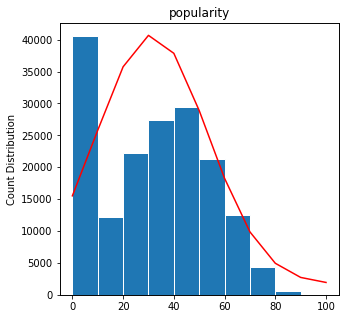

Category:popularity, Average =31.43, Standard Deviation =21.83




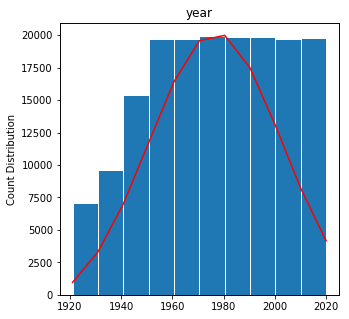

Category:year, Average =1976.79, Standard Deviation =25.92




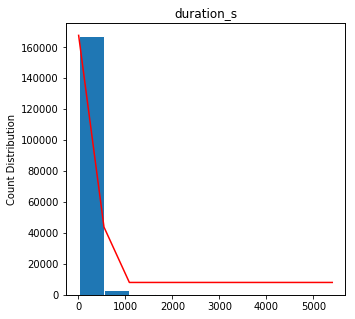

Category:duration_s, Average =230.95, Standard Deviation =126.12




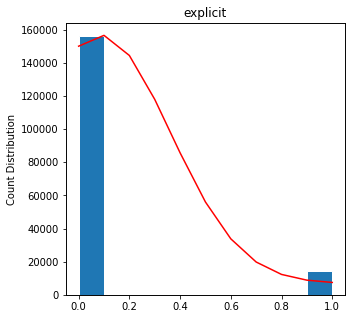

Category:explicit, Average =0.08, Standard Deviation =0.28




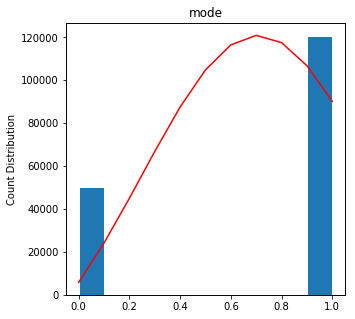

Category:mode, Average =0.71, Standard Deviation =0.46




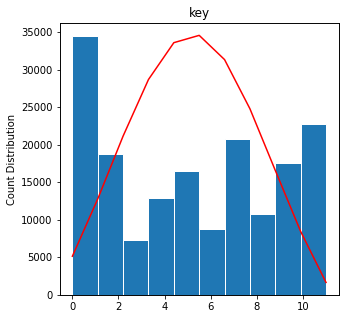

Category:key, Average =5.2, Standard Deviation =3.52




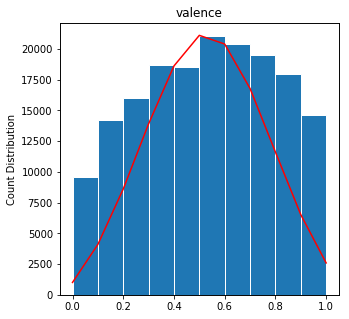

Category:valence, Average =0.53, Standard Deviation =0.26




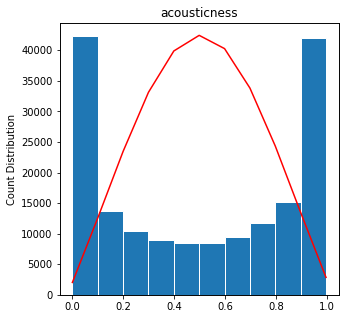

Category:acousticness, Average =0.5, Standard Deviation =0.38




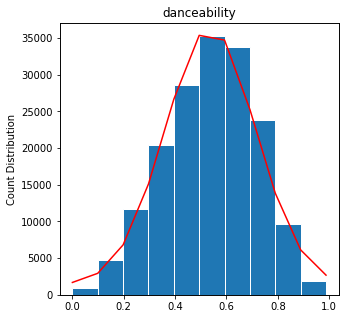

Category:danceability, Average =0.54, Standard Deviation =0.18




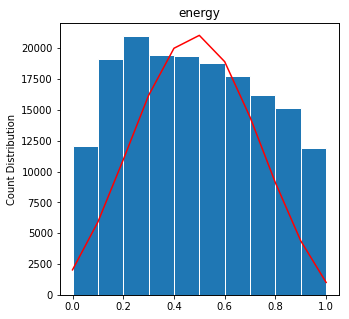

Category:energy, Average =0.48, Standard Deviation =0.27




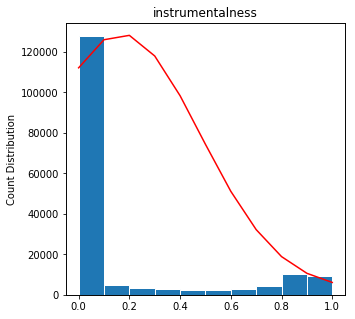

Category:instrumentalness, Average =0.17, Standard Deviation =0.31




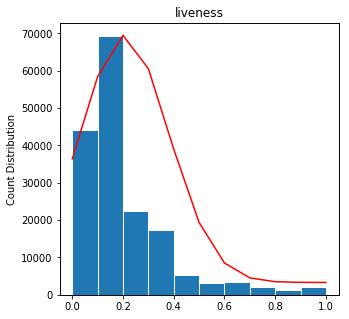

Category:liveness, Average =0.21, Standard Deviation =0.17




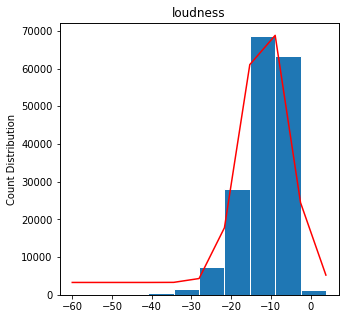

Category:loudness, Average =-11.47, Standard Deviation =5.7




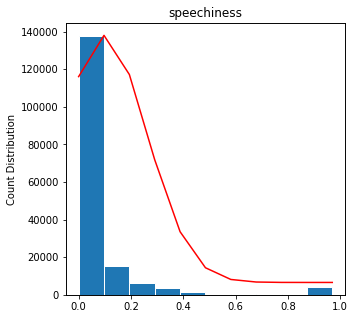

Category:speechiness, Average =0.1, Standard Deviation =0.16




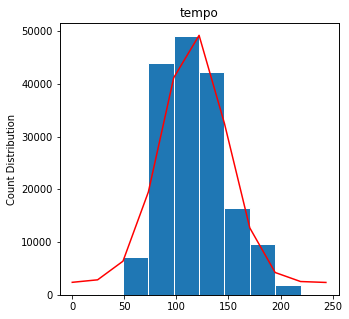

Category:tempo, Average =116.86, Standard Deviation =30.71



In [12]:
list = ['popularity', 'year', 'duration_s', 'explicit', 'mode', 'key', 'valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

for category in list:
    print()
    hist_plot(category)
    print()

#### Observations
Popularity:
>When looking at the popularity of all the songs in Spotify's database, other than the large number of unpopular songs, the rest follows a normal distribution.   
From the distribution we can see that a song can rarely score a popularity score of over 80.

Others:
>- There are a large number of mostly instrumental music, over 120 thousands tracks seems to be purly instrumental and have no lyrics at all. It is interesting to see if this is something to keep in mind in the analysis to come
>- About two thirds of songs are composed in a Major scale and one thirds in the Minor scale.

#### Dropping 0 Popularity Tracks

This helps with giving a more accuate analysis

In [13]:
flags = dfClean[dfClean['popularity'] == 0].index
dfClean = dfClean.drop(flags)

In [14]:
dfClean.describe()

,popularity,year,duration_s,explicit,mode,key,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
count,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000,142761.000000
mean,37.572796,1983.466577,234.179821,0.083895,0.709073,5.199732,0.532026,0.434115,0.544036,0.523557,0.131680,0.202430,-10.744211,0.080098,118.455797
std,18.404962,22.152608,118.899825,0.277232,0.454191,3.516955,0.262220,0.356590,0.174606,0.262370,0.282739,0.176639,5.413633,0.113958,30.384292
min,1.000000,1921.000000,14.708000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000
25%,25.000000,1966.000000,173.840000,0.000000,0.000000,2.000000,0.321000,0.070100,0.427000,0.312000,0.000000,0.095900,-13.578000,0.034000,95.090000
50%,38.000000,1984.000000,214.760000,0.000000,1.000000,5.000000,0.540000,0.384000,0.554000,0.530000,0.000093,0.131000,-9.845000,0.043300,115.999000
75%,51.000000,2002.000000,267.040000,0.000000,1.000000,8.000000,0.750000,0.789000,0.670000,0.739000,0.028900,0.254000,-6.730000,0.069400,137.183000
max,100.000000,2020.000000,5403.500000,1.000000,1.000000,11.000000,1.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.744000,0.969000,243.507000


### Correlation Analysis
Below I generate a heatmap of the correlation coefficients of all the charactersitics to examine influential factors in a tracks popularity.


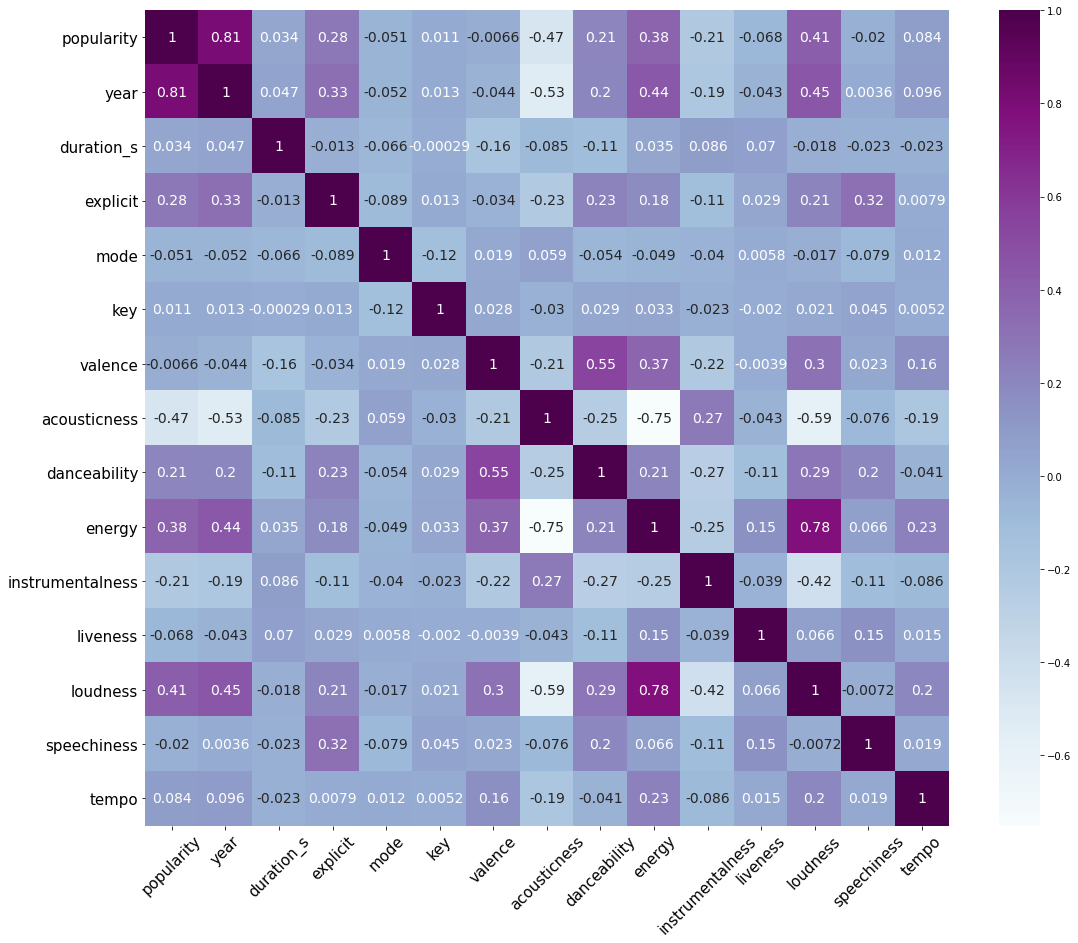

In [15]:
fig, ax = plt.subplots(figsize=(18,15))
ax = sns.heatmap(
    dfClean.corr(),
    cmap='BuPu',
    annot=True,
    annot_kws={"size": 14}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    fontsize=15
)
plt.yticks(fontsize=15)
plt.show()

#### Insights
Year:

>According to the heatmap of correlations shown above, the one factor with the strongest correlation with popularity is year at 0.86, meaning each 1 year increase leads to 0.86 increase in popularity.
<br><br>
This makes sense, since generally newer songs has a higher listen rate on spotify thus givin them a overall higher popularity.
<br><br>
However given a new song cannot be written in the past, this infomation is rather useless for our purposes. The best solution is to ignore the realease year, since this is a factor we cannot control. 

Energy and Loudness:

>Aside from the release year, energy has the a medium-strong correlation with popularity at 0.49. Loudness follows thrid with a correlation coefficient of 0.46.
<br><br>
What is interesting is the extremely strong correlation between energy and loudness themselves at 0.78, this is possibly due to how humans tends to mistake loundness with high energy. Or more likely, the algorithms of Spotify takes loundness into account when calculation a score for energy.
<br><br>
This means that if a song writer were to compose a popular track in spotify it is best to make the song energetic, most likely through the means of increasing the loudness.

Mode (Major / Minor):

>In this category popularity has a weak negative correlation with the Major scale at -0.029, meaning that people actually have a slight preference to a track composed in the Minor scale.

Acousticness:

>Acousticness has a strong -0.57 correlation with popularity; meaning that people strongly prefer electonic instruments like electric guitars and keyboards over acoustic ones such as acoustic guitar, piano, or orchestra.

Other Negative Correlations:

>Speechiness, liveness, and instrumentalness are the other three characteristics that negatively correlated to popularity.
<br><br>
This means a live performaces, instrumental music are not popular among the people who streams music online.



### Time Series Analysis

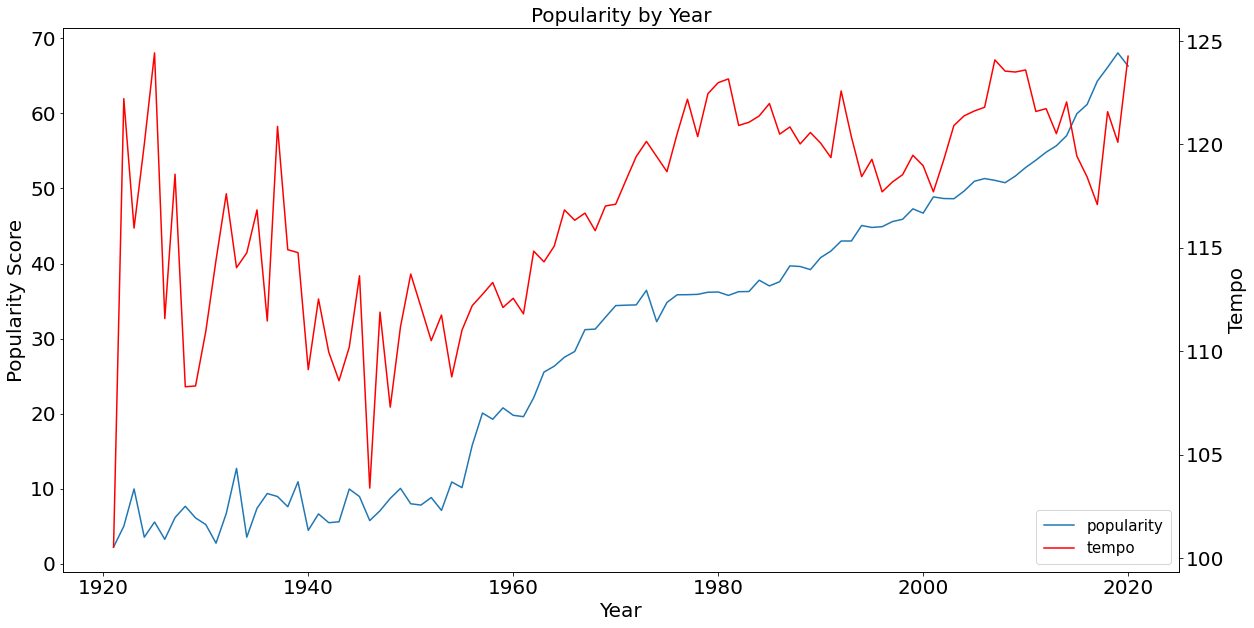

In [16]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.plot(dfClean['year'].unique(), dfClean.groupby('year')['popularity'].mean(), label='popularity')

ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Popularity Score', fontsize=20)
plt.title('Popularity by Year', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax1.plot(np.nan, '-r', label = 'tempo') # Legend for the second axis

ax2 = ax1.twinx()
ax2.plot(dfClean['year'].unique(), dfClean.groupby('year')['tempo'].mean(), label='tempo', color ='red')
ax2.set_ylabel('Tempo', fontsize=20)
plt.yticks(fontsize=20)

ax1.legend(prop={'size': 15}, borderpad=0.55, labelspacing=0.5, loc='lower right')

plt.show()

Popularity steadily rises as the year increases, showing that more recent songs are favored by the users

We can see that the tempo of all songs has also been increasing over the years, indicating that generally songs are getting faster pace.

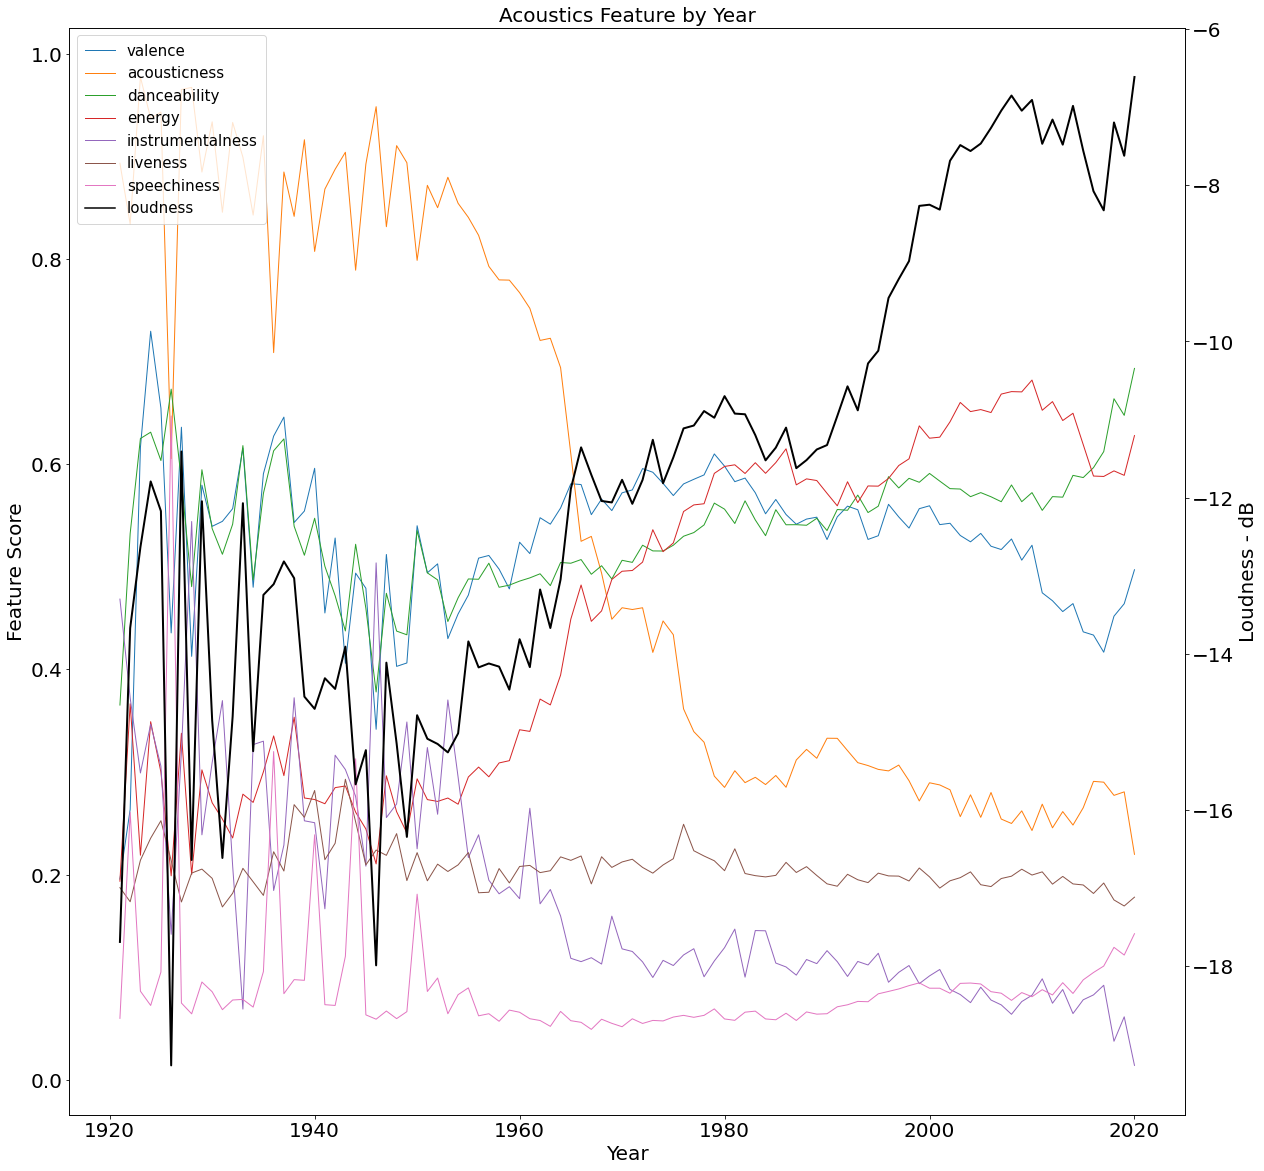

In [17]:
features = [
    'valence',
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'speechiness',
]
# Initiation
fig, ax1 = plt.subplots(figsize=(20,20))

# 0 to 1 features
for category in features:
    y = dfClean.groupby('year')[category].mean()
    ax1.plot(dfClean['year'].unique(), y, label=category, linewidth=1)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Feature Score', fontsize=20)
ax1.plot(np.nan, '-r', label = 'loudness', color = 'black')
plt.title('Acoustics Feature by Year', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Loudness Line
ax2 = ax1.twinx()
ax2.plot(dfClean['year'].unique(), dfClean.groupby('year')['loudness'].mean(), label='loudness', linewidth=2, color ='black')
ax2.set_ylabel('Loudness - dB', fontsize=20)
plt.yticks(fontsize=20)

# Legends
ax1.legend(prop={'size': 15}, borderpad=0.55, labelspacing=0.5, loc='upper left')
plt.show()

#### Insights
Loudness Trends
>According to this time series analysis, there exists a clear increasing trend in the overall volume of songs.

Characteristics with increasing Trends
>- Energy
>- Danceability

Characteristics with decreasing Trends
>- Acousticness 
>- Instrumentalness
>- Liveness

Characteristics with stable Trends
>- Valence
>- Speechiness



---

## Genre Analysis
### Overview
Below we have a overview of the dataset grouped by Genre:

In [18]:
dfGenre.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


We can see that one genre is actually "[ ]", it has no value and should be removed for our need.

In [19]:
dfGenre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


### Cleaning

In [20]:
dfGenre['genres'] = dfGenre['genres'].str.replace('[','n', regex=True)
dfGenre['genres'] = dfGenre['genres'].str.replace(']','a', regex=True)
dfGenre['genres'] = dfGenre['genres'].replace('na',np.nan, regex=False)
dfGenre.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,NaN,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [21]:
dfGenre.dropna(inplace=True)

In [22]:
dfGenre.describe()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,2972.000000,2972.000000,2972.000000,2.972000e+03,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000,2972.000000
mean,0.833109,0.401157,0.537190,2.517272e+05,0.561190,0.211368,0.192791,-10.509249,0.083580,119.020796,0.492741,39.925598,5.938425
std,0.372941,0.319781,0.150693,9.467215e+04,0.234511,0.267374,0.092370,5.370006,0.080495,17.471762,0.201853,16.747890,3.368621
min,0.000000,0.000003,0.056900,3.094600e+04,0.001002,0.000000,0.022200,-41.825000,0.023800,47.135722,0.003353,0.000000,0.000000
25%,1.000000,0.119036,0.441169,2.063674e+05,0.395030,0.004829,0.137682,-12.428814,0.044900,109.191107,0.348558,32.531911,3.000000
50%,1.000000,0.321706,0.546511,2.375479e+05,0.601264,0.080663,0.178752,-9.219409,0.059432,119.199333,0.499936,43.059365,7.000000
75%,1.000000,0.674088,0.647536,2.773008e+05,0.730202,0.343333,0.220858,-6.919969,0.091000,127.510813,0.640380,51.139881,9.000000
max,1.000000,0.996000,0.929000,2.382587e+06,0.994667,0.992000,0.960000,0.060000,0.946219,204.212000,0.980000,80.666667,11.000000


There is only one row with genre of [ ], this reduces our total row of 2973 to 2972 unique genres.

In [23]:
dfGenre['duration_ms'] = dfGenre['duration_ms']/1000
dfGenre.rename(columns={'duration_ms': 'duration_s'}, inplace=1)

This converts ms to s in duration for better clarity.

In [24]:
dfGenre.head()

,mode,genres,acousticness,danceability,duration_s,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,160.297667,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1048.887333,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,115.177000,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
4,1,a cappella,0.676557,0.538961,190.628541,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,abstract,0.459210,0.516167,343.196500,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1


### Analysis

Lets begin with looking at the top 10 popular genres:

In [25]:
genre_sorted = dfGenre.sort_values(by='popularity', ascending=False)
top15 = genre_sorted.iloc[0:15, :]
top15.reset_index(drop=True, inplace=True)
top15

,mode,genres,acousticness,danceability,duration_s,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,basshall,0.213167,0.818000,169.799167,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
1,1,south african house,0.043833,0.847000,311.854333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2,1,trap venezolano,0.044600,0.877000,231.848000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
3,0,turkish edm,0.008290,0.698000,186.700000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
4,0,chinese electropop,0.002570,0.660000,217.088000,0.787000,0.000000,0.323000,-4.592000,0.032000,142.018000,0.199000,78.500000,1
5,0,alberta hip hop,0.330000,0.885000,144.000000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11
6,0,afroswing,0.318450,0.711750,179.995375,0.580187,0.000258,0.189950,-7.016687,0.195563,83.250125,0.676625,77.312500,11
7,0,afro soul,0.006270,0.766000,202.627000,0.873000,0.000000,0.076400,-6.381000,0.143000,126.988000,0.743000,77.000000,11
8,0,uk diy punk,0.000209,0.452000,209.598000,0.937000,0.000004,0.606000,-3.346000,0.161000,164.032000,0.604000,77.000000,1
9,1,guaracha,0.009030,0.745000,189.818000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7


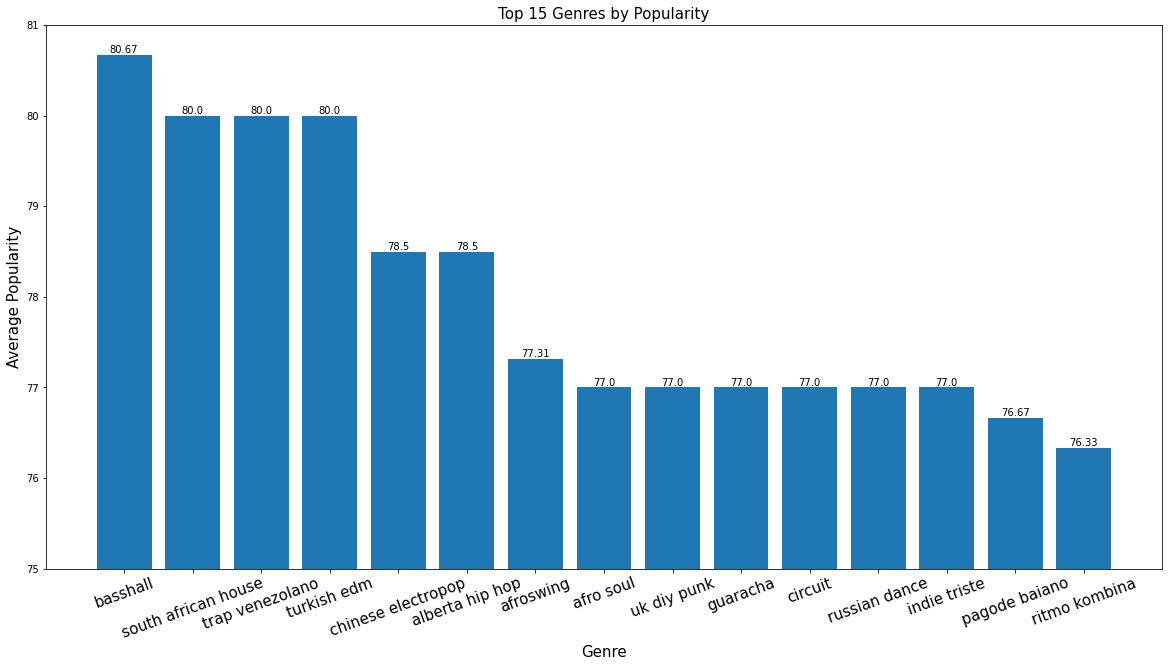

In [38]:
fig, ax = plt.subplots(figsize = (20,10))

ax.bar(top15['genres'], top15['popularity'])
ax.set_ylim(75, 81)
for i in range(0,15):
    plt.text(i, top15['popularity'][i], str(top15['popularity'][i].round(2)), ha='center', va='bottom')
    i += 1
ax.set_title('Top 15 Genres by Popularity', fontsize = 15)
ax.set_ylabel('Average Popularity', fontsize = 15)
ax.set_xlabel('Genre', fontsize = 15)
plt.xticks(rotation = 20, fontsize = 15)

plt.show()

#### Insights

This genre is way to specific, we would like to aggregate it to its wider genre; for example, alberta hiphop and argentine hiphop are both combined under the genre hiphop.

### Key Exploration

In [27]:
dfClean.head()

,id,name,artists,release_date,popularity,year,duration_s,explicit,mode,key,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","Sergei Rachmaninoff, James Levine, Berliner Ph...",1921,4,1921,831.667,0,1,10,0.0594,0.982,0.279,0.211,0.878000,0.665,-20.096,0.0366,80.954
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,Dennis Day,1921,5,1921,180.533,0,1,7,0.9630,0.732,0.819,0.341,0.000000,0.160,-12.441,0.4150,60.936
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,1921,5,1921,500.062,0,1,3,0.0394,0.961,0.328,0.166,0.913000,0.101,-14.850,0.0339,110.339
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,Frank Parker,1921,3,1921,210.000,0,1,5,0.1650,0.967,0.275,0.309,0.000028,0.381,-9.316,0.0354,100.109
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,Phil Regan,1921,2,1921,166.693,0,1,3,0.2530,0.957,0.418,0.193,0.000002,0.229,-10.096,0.0380,101.665


In [28]:
dfKey = dfClean.groupby('key', as_index=False).mean()
key_sorted = dfKey.sort_values(by = 'popularity', ascending = False)
key_sorted

,key,popularity,year,duration_s,explicit,mode,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
6,6,41.854316,1989.389193,235.024028,0.138526,0.570947,0.522072,0.352598,0.566072,0.569185,0.104193,0.199933,-9.933669,0.105521,117.923971
1,1,41.547986,1989.218762,238.126411,0.189029,0.735604,0.504565,0.362690,0.568975,0.560054,0.125840,0.195382,-10.081828,0.106039,117.233959
11,11,41.446762,1989.254902,239.237014,0.139079,0.458162,0.539847,0.317141,0.570369,0.595815,0.105649,0.210712,-9.798313,0.102895,119.484638
4,4,38.974633,1985.007482,234.808982,0.072999,0.567114,0.519694,0.402356,0.531196,0.544560,0.124810,0.210790,-10.629000,0.070763,119.415713
9,9,37.981615,1983.559028,233.623890,0.059882,0.671175,0.549787,0.385791,0.541403,0.555294,0.117483,0.199083,-10.434346,0.077537,120.862812
2,2,37.598408,1983.646908,236.147196,0.064352,0.794473,0.527277,0.410693,0.529650,0.539946,0.134035,0.206082,-10.664486,0.069263,119.104576
8,8,36.926034,1982.671088,233.764303,0.101169,0.819357,0.528680,0.472869,0.547679,0.506763,0.135734,0.187191,-10.775667,0.086191,117.925416
7,7,36.762032,1982.542509,230.083199,0.068729,0.806810,0.544986,0.442787,0.542983,0.515353,0.134000,0.210593,-10.897251,0.071616,118.616723
0,0,36.290083,1981.616481,233.355497,0.054991,0.813674,0.535622,0.464850,0.540457,0.497781,0.139686,0.204970,-11.041288,0.067068,118.591106
10,10,35.645539,1980.836387,234.316403,0.090217,0.642435,0.538604,0.497318,0.555115,0.486309,0.131167,0.197806,-11.126271,0.095403,116.033579


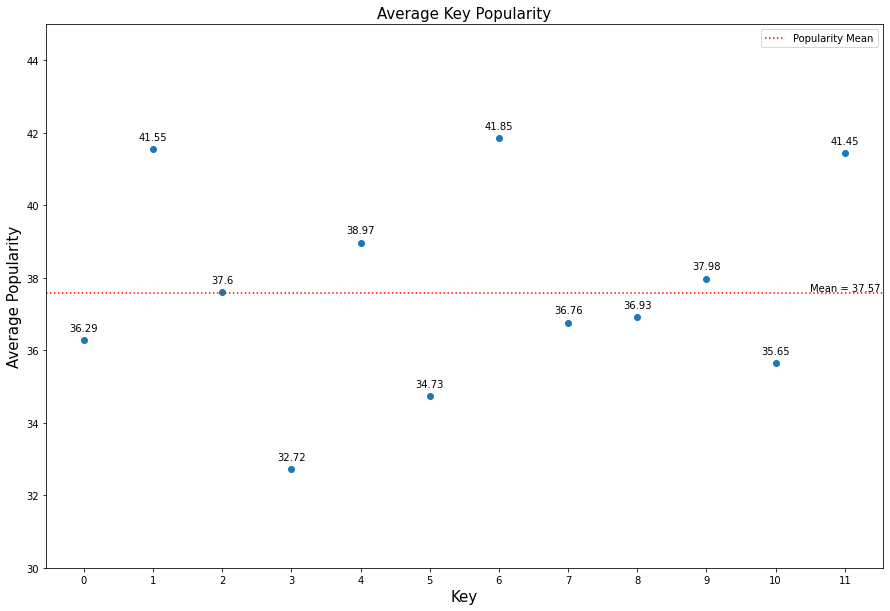

In [29]:
xticks = key_sorted['key'].sort_values().tolist()

fig, ax = plt.subplots(figsize = (15,10))

ax.scatter(key_sorted['key'], key_sorted['popularity'])
ax.set_ylim(30, 45)
for i in range(0,12):
    plt.text(i, key_sorted['popularity'][i] + 0.2, str(key_sorted['popularity'][i].round(2)), ha='center', va='bottom')
    i += 1
ax.set_title('Average Key Popularity', fontsize = 15)
ax.set_ylabel('Average Popularity', fontsize = 15)
ax.set_xlabel('Key', fontsize = 15)
ax.set_xticks(xticks)
ax.axhline(y = 37.57, color = 'r', linestyle = ':', label='Popularity Mean')
plt.text(10.5, 37.57, 'Mean = 37.57', ha='left', va='bottom')
ax.legend(loc='upper right')

plt.show()

This indicates that **D#/E♭** should be **avoided**. Its average popularity is **4.84 (12.9%)** below average of 37.57.  People do not like tracks in this key as much as the other keys.

On the other hand 1 **C#/D♭**, 6 **F#/G♭**, and 11 **B** keys have average popularity score of **3.98 (10.6%)**, **4.28 (11.4%)**, and **3.88 (10.3%)** above overall average. They are slightly preferred by the public.

## Conclusion

Post analysis I would like to give the following suggestions to aspiring artist that hope to improve their playtime on Spotify. During the composition of the music, pleae consider reducing the use of acoustic elements, as they have become less and less popular overtime; compose louder and more energy packed songs as this is the current trned in listentime on Spotify; and lastly avoid D#/E♭ as main key for the track since the data shows that these keys are at a noticable disadvantage in listening time. Over all these are some of the noticable influences a property of music can have on the potential listen time on Spotify.